In [1]:
import numpy as np
import re
from razdel import sentenize

In [2]:
from matplotlib import pyplot as plt
IMG_DIR = 'plots/'

In [3]:
files = [
    'Geyger_Size',
    'Inn_Size',
    'Nas_Size',
]

In [4]:
wc = lambda line: len(re.findall('[а-яА-Я0-9a-z\-]+', line))

Geyger_Size, количество слов в предложении:
  среднее значение:   6.2;
  медианное значение: 6.0;
  (752 слов в 122 предложениях). 

Inn_Size, количество слов в предложении:
  среднее значение:   9.0;
  медианное значение: 8.0;
  (9026 слов в 1001 предложениях). 

Nas_Size, количество слов в предложении:
  среднее значение:   9.8;
  медианное значение: 9.0;
  (1515 слов в 154 предложениях). 



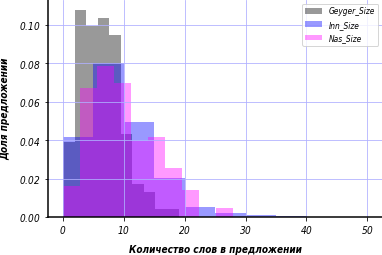

In [5]:
for file in files:

    sizes = list()

    with open(file, 'r') as f:
        for line in f:
            sizes.extend(
                [wc(sentence.text) for sentence in sentenize(line)]
            )

    plt.xlabel('Количество слов в предложении')
    plt.ylabel('Количество предложений')


    plt.hist(
        sizes, 
        label=file, 
        density=True, 
        alpha=0.4,
    )
    # plt.savefig(IMG_DIR + file + '_hist.png')
    # plt.clf()

    sizes = np.array(sizes)

    print(file + ', количество слов в предложении:')
    print('  среднее значение:   %.1f;' % np.mean(sizes))
    print('  медианное значение: %.1f;' % np.median(sizes))
    print('  (%d слов в %d предложениях). ' % (
        np.sum(sizes),
        sizes.size,
    ))
    print()


plt.xlabel('Количество слов в предложении')
plt.ylabel('Доля предложений')
plt.legend()
plt.savefig(IMG_DIR + 'total_hist.png')

